# Random Imputation

In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("D:\\Machine_learning\\csv_files\\train.csv",usecols=['Age','Fare','Survived'])

In [35]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [37]:
x=df.drop(columns='Survived')
y=df['Survived']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [39]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [40]:
x_train['Age_impute']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [41]:
x_train.head()

,Age,Fare,Age_impute
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [42]:
# counting the empty value:
x_train['Age_impute'][x_train['Age_impute'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_impute, Length: 148, dtype: float64

In [43]:
# finding the random value of the age:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([45.  , 29.  , 29.  , 17.  , 27.  , 27.  , 54.  , 42.  , 39.  ,
       33.  , 18.  , 11.  , 25.  , 40.  , 43.  , 28.  , 47.  , 33.  ,
       48.  ,  9.  , 40.5 , 40.  , 36.  , 34.5 , 36.  , 23.  , 38.  ,
       16.  ,  9.  , 22.  , 24.  , 33.  , 25.  , 51.  ,  4.  , 36.  ,
       22.  , 45.5 , 47.  , 20.  , 49.  , 29.  , 21.  ,  0.83, 40.  ,
       47.  , 51.  , 35.  , 64.  , 40.  , 22.  , 36.  , 42.  , 57.  ,
       17.  , 58.  , 30.  , 30.  , 45.  , 30.  , 41.  ,  4.  , 32.5 ,
       42.  , 18.  , 23.  , 14.5 , 60.  ,  4.  , 47.  , 49.  , 24.  ,
       32.  , 58.  , 42.  , 35.  , 39.  , 18.  , 28.5 , 40.  , 18.  ,
       45.  , 32.  , 27.  , 45.5 , 32.  , 42.  , 16.  , 19.  , 23.  ,
       25.  , 61.  , 44.  , 16.  , 33.  , 19.  , 32.  , 19.  , 30.  ,
       34.  , 26.  , 35.  , 36.  , 28.  , 57.  , 56.  , 33.  , 60.  ,
       29.  , 36.  , 27.  , 31.  , 18.  , 20.  , 50.  , 62.  , 29.  ,
       31.  , 19.  , 24.  , 23.  , 26.  , 16.  , 21.  , 19.  , 18.  ,
        2.  ,  4.  ,

In [44]:
x_train['Age_impute'][x_train['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [45]:
x_train

,Age,Fare,Age_impute
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,17.0
493,71.0,49.5042,71.0
527,NaN,221.7792,45.0


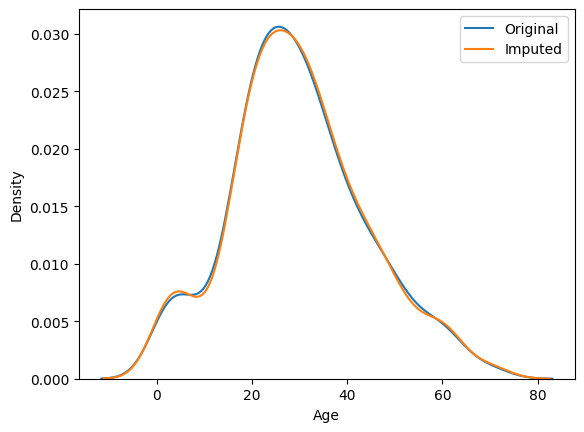

In [46]:
sns.kdeplot(x_train['Age'],label='Original')
sns.kdeplot(x_train['Age_impute'],label='Imputed')

plt.legend()
plt.show()

In [47]:
print('Original variable variance: ',x_train['Age'].var())
print('Variance after random imputation: ',x_train['Age_impute'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  206.32674780574916


In [48]:
x_train[['Fare','Age','Age_impute']].cov()

,Fare,Age,Age_impute
Fare,2368.246832,71.512440,55.457336
Age,71.512440,204.349513,204.349513
Age_impute,55.457336,204.349513,206.326748


<Axes: >

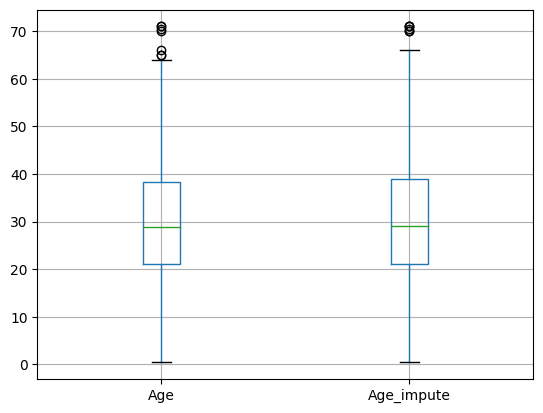

In [49]:
x_train[['Age','Age_impute']].boxplot()

In [50]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [51]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [52]:
x=data
y=data['SalePrice']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']


x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [55]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
588,Gd,TA,143000,TA,Gd
570,NaN,TA,142600,TA,NaN
211,NaN,TA,186000,TA,NaN
928,TA,TA,236500,TA,TA
1416,NaN,TA,122500,TA,NaN


In [56]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\hp\AppData\Local\Temp\ipykernel_7708\3256311682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
C:\Users\hp\AppData\Local\Temp\ipykernel_7708\3256311682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
C:\Users\hp\AppData\Local\Temp\ipykernel_7708\3256311682.py:4: SettingWithCopyWarning: 
A value is trying

In [57]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,TA
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [58]:
temp=pd.concat(
    [
        x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts()/len(x_train)
    ],
    axis=1
)
temp.columns=['Original','imputed']

In [59]:
temp

,Original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [60]:
temp=pd.concat(
    [
        x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts()/len(df)
    ],axis=1
)
temp.columns=['Original','imputed']

In [61]:
temp

,Original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.537598
Fa,0.040917,0.053872
Po,0.027823,0.038159
Ex,0.024550,0.030303


C:\Users\hp\AppData\Local\Temp\ipykernel_7708\2729153118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\hp\AppData\Local\Temp\ipykernel_7708\2729153118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

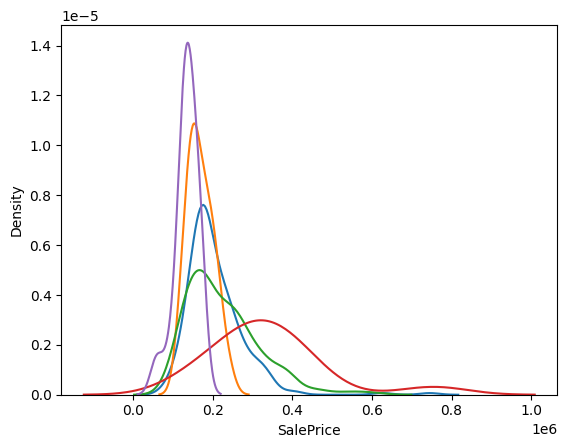

In [63]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_7708\3731921799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\hp\AppData\Local\Temp\ipykernel_7708\3731921799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

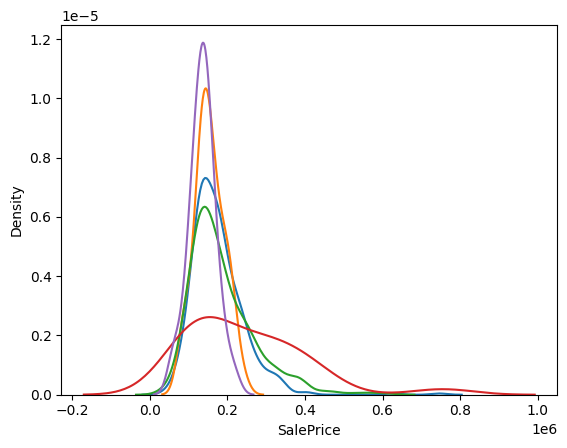

In [64]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show()